# Greyskin87 - The Star Wars Survey

This notebook is based on a tutorial by DataQuest and data by FiveThirtyEight

Some of the main columns in the data set are:

+ <b>RespondentID</b> - An anonimized ID for the respondent (person taking the survey)
+ <b>Gender</b> - The respondent's gender
+ <b>Age</b> - The respondent's age
+ <b>Household Income</b> - The respondent's income
+ <b>Education</b> - The respondent's education level
+ <b>Location (Census Region)</b> - The respondent's location
+ <b>Have you seen any of the 6 film in the Star Wars franchise?</b> - Has a <b>Yes</b> or <b>No</b> response
+ <b>Do you consider yourself to be a fan of the Star Wars film franchise?</b> - Has a <b>Yes</b> or <b>No</b> response

Once given the context, let's start importing the data

In [1]:
import pandas as pd
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [2]:
# Let's see all of the column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

# Data Cleaning

## First column - NaN removal

My first chore in cleaning the data will be to remove the rows for which the RespondentID is NaN (I disagree with it, I'm losing a header this way!)


In [3]:
print('No. of row before: '+str(star_wars.shape))
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]
star_wars.head(10)
print('No. of row after: '+str(star_wars.shape))


No. of row before: (1187, 38)
No. of row after: (1186, 38)


## 2nd, 3rd columns: convert in Boolean Columns

Next, let's look at second and third columns. They are Yes/No/None column, so it will be easier to convert them in Boolean columns

In [4]:
# Creating dictionary for the replacement
yes_no = {
    'Yes': True,
    'NO': False
}

# Columns on whitch I want to apply this
cols = ['Have you seen any of the 6 films in the Star Wars franchise?', 'Do you consider yourself to be a fan of the Star Wars film franchise?' ]

# Actual replacement
for col in cols:
    star_wars[col] = star_wars[col].map(yes_no)

## 4th to 9th column (Movie seen): convert in Boolean Columns

This will be harder: I have to check if the person looked the film (True) or not and convert the column name to something more readable and usable.

If the person looked the film, the cell will be valorized with the film name... I have to check what is written in the column then...


In [5]:
# Colums that I need
cols = star_wars.columns[3:9]

In [6]:
import numpy as np
for col in cols:
    # Extract the name of the film (value_counts skips NaN so I'm sure is the first)
    film_name = star_wars[col].value_counts().index[0]
    
    # First_check: print all the film names
    # print(film_name)
    
    # Create a dictionary for that film
    col_dict = {film_name: True, np.NaN: False}
    
    # Convert the column to a Boolean Column
    star_wars[col] = star_wars[col].map(col_dict)

Now I can rename the columns in a more usable way

In [7]:
# Create the dictionary to rename the columns
cols_dict = {}
for i in range(0,6):
    cols_dict[cols[i]] = 'seen_'+str(i+1)

# Apply the dictionary and rename the columns
star_wars = star_wars.rename(columns=cols_dict)

## 10th to 15th column (Film Ranking): convert to a numeric datatype

The column containing the ranking should not be as hard as the previous ones: I just have to convert the numbers to a numeric type and rename the columns in a more readable and usable way

In [8]:
# I need to convert to a "float" type since I need to represent NaN
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [9]:
cols_dict = {}
cols = star_wars.columns[9:15]

for i in range(0,6):
    cols_dict[cols[i]] = 'ranking_'+str(i+1)
    
star_wars = star_wars.rename(columns=cols_dict)

# Data Analysis

## Find the highest-ranked movie

The original question was to find the highest-ranked movie in the Star Wars Franchise. Time to get that answer!

It seems a joke, but in this case the lowest number means the higher rank!

In [13]:
cols = star_wars.columns[9:15]
rankings = star_wars[cols].mean()
rankings

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

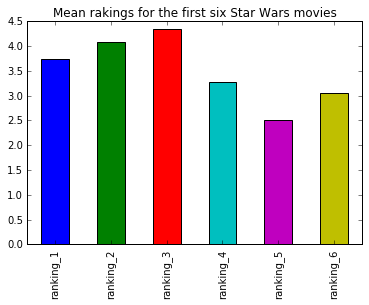

In [16]:
# Time for some visuals!
import matplotlib.pyplot as plt
%matplotlib inline

ax = rankings.plot.bar()
ax.set_title('Mean rakings for the first six Star Wars movies')


In the end, the best film was indeed "<b>Episode V: The Empire Strikes Back!</b>"

## But how many people saw them?

Let's see how many people in the surveyed sample have seen each film!

In [15]:
cols = star_wars.columns[3:9]

seen = star_wars[cols].sum()
seen


seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

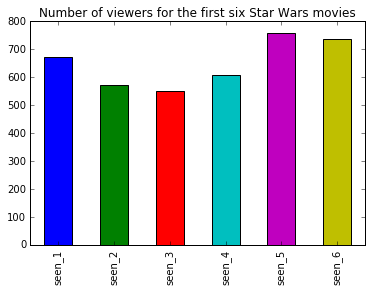

In [17]:
seen.plot.bar(title='Number of viewers for the first six Star Wars movies')

I didn't see it coming! How is it that somebody saw "Episode V" without seen "Episode IV"?! It does not make sense!

It seems, also, that the newest trilogy (Episode I-III) has less fans that the original one. This is also coherent with the rankings!

At this point, probably, should be better to see what is the ranking for only the people who saw <b>all</b> the films!

## Binary populations

Can be interesting to see how the trends change if we look at certain population segments.

Let's start with <b>Males vs Females<b>!

In [18]:
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

seen_cols = star_wars.columns[3:9]
ranking_cols = star_wars.columns[9:15]

males_seen = males[seen_cols].sum()
males_rank = males[ranking_cols].mean()

females_seen = females[seen_cols].sum()
females_rank = females[ranking_cols].mean()


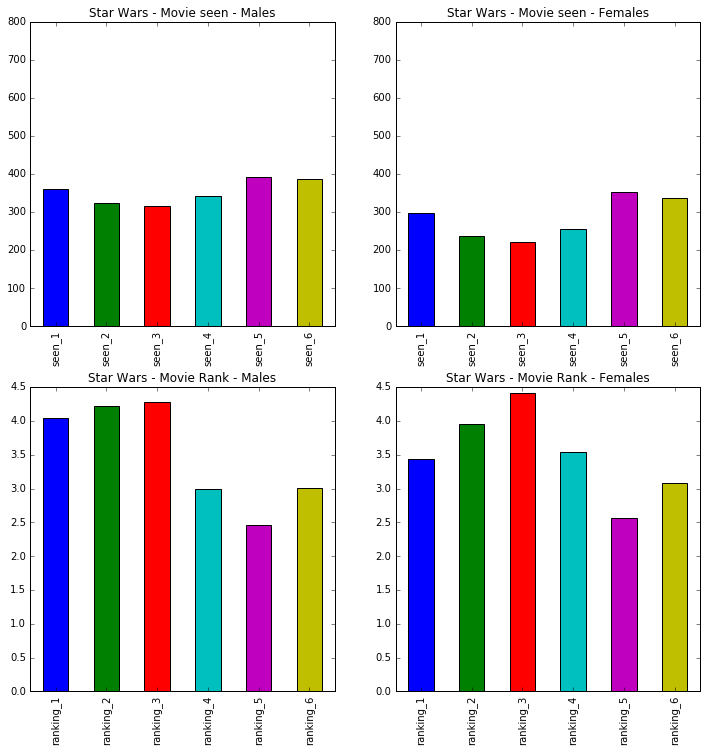

In [48]:
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(2,2,1)
males_seen.plot.bar(title='Star Wars - Movie seen - Males')
ax1.set_ylim(0,800)

ax2 = fig.add_subplot(2,2,2)
females_seen.plot.bar(title='Star Wars - Movie seen - Females')
ax2.set_ylim(0,800)

ax3 = fig.add_subplot(2,2,3)
males_rank.plot.bar(title='Star Wars - Movie Rank - Males')

ax4 = fig.add_subplot(2,2,4)
females_rank.plot.bar(title='Star Wars - Movie Rank - Females')


From the graphs about we can see that rankings and film seen are equally distibuted between males and females respondents.

Looking at the rankings, males tend to prefer the original trilogy, while females likes Episode I more than Episode IV! 

Nevertheless, Episode V is the favorite followed by Episode VI

Now, it's time to Star Wars <b>fan vs not fan</b>

In [37]:
fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
not_fans = star_wars[pd.isnull(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'])]

seen_cols = star_wars.columns[3:9]
ranking_cols = star_wars.columns[9:15]

fans_seen = fans[seen_cols].sum()
fans_rank = fans[ranking_cols].mean()

not_fans_seen = not_fans[seen_cols].sum()
not_fans_rank = not_fans[ranking_cols].mean()


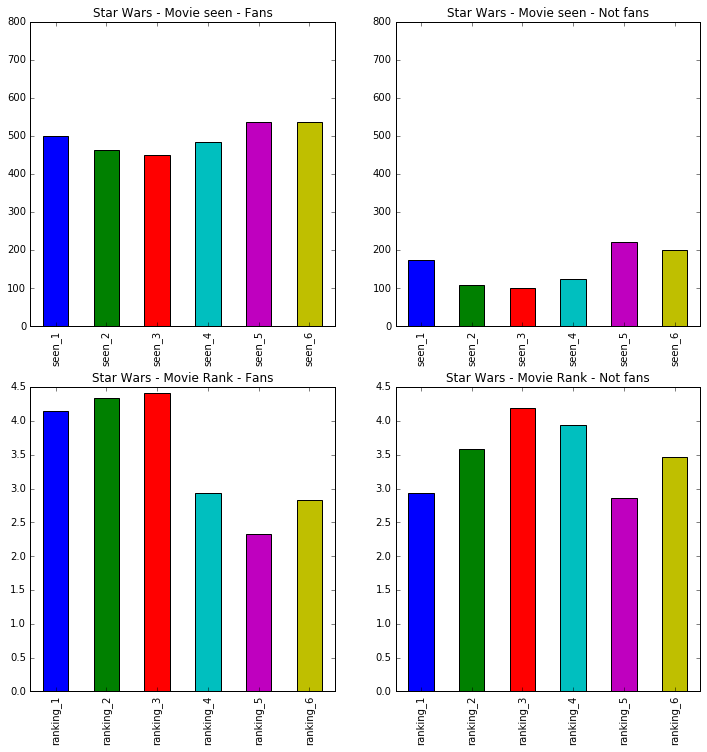

In [49]:
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(2,2,1)
fans_seen.plot.bar(title='Star Wars - Movie seen - Fans')
ax1.set_ylim(0,800)

ax2 = fig.add_subplot(2,2,2)
not_fans_seen.plot.bar(title='Star Wars - Movie seen - Not fans')
ax2.set_ylim(0,800)

ax3 = fig.add_subplot(2,2,3)
fans_rank.plot.bar(title='Star Wars - Movie Rank - Fans')

ax4 = fig.add_subplot(2,2,4)
not_fans_rank.plot.bar(title='Star Wars - Movie Rank - Not fans')

Ok, now things are interesting

While fans saw almost every film, not-fan viewers are focused on Episode V, Episode VI and Episode I (but they're far less than the fans)

As per the ratings, fans tend to appreciate more the original trilogy, while not fans enjoyment is more distributed across the movies, with Episode V and Episode I fighting for the first place

To conclude, let's see how the <b>Star Trek fans</b> rate Star Wars Movies

In [46]:
st_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'Yes']
st_not_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'No']

seen_cols = star_wars.columns[3:9]
ranking_cols = star_wars.columns[9:15]

st_fans_seen = st_fans[seen_cols].sum()
st_fans_rank = st_fans[ranking_cols].mean()

st_not_fans_seen = st_not_fans[seen_cols].sum()
st_not_fans_rank = st_not_fans[ranking_cols].mean()

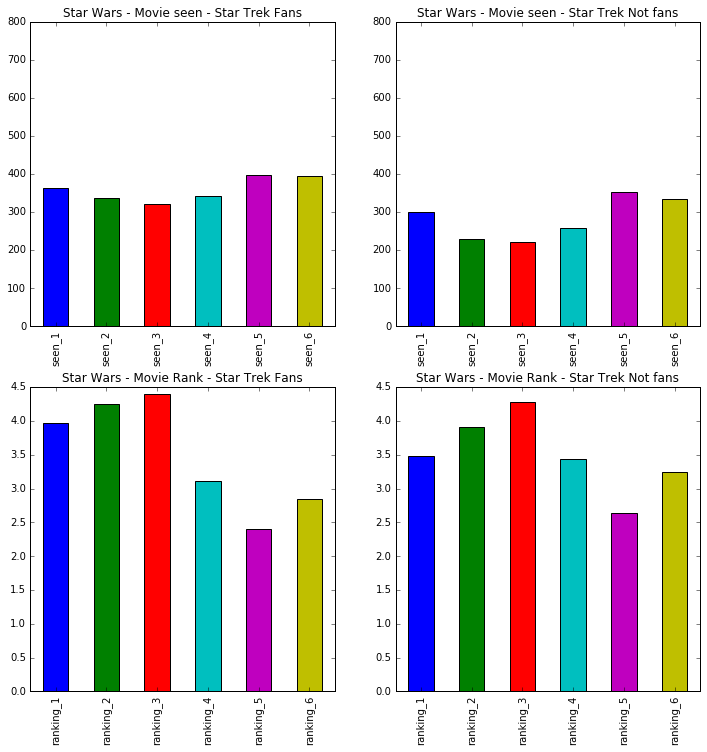

In [50]:
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(2,2,1)
st_fans_seen.plot.bar(title='Star Wars - Movie seen - Star Trek Fans')
ax1.set_ylim(0,800)

ax2 = fig.add_subplot(2,2,2)
st_not_fans_seen.plot.bar(title='Star Wars - Movie seen - Star Trek Not fans')
ax2.set_ylim(0,800)

ax3 = fig.add_subplot(2,2,3)
st_fans_rank.plot.bar(title='Star Wars - Movie Rank - Star Trek Fans')

ax4 = fig.add_subplot(2,2,4)
st_not_fans_rank.plot.bar(title='Star Wars - Movie Rank - Star Trek Not fans')

Roughly half of the survey population is a Star Trek fan also. Fans tend to see all the movies, while a part of not-fans has only seen Episode V, Episode VI, Episode I.

As per the ratings, Star Trek fans tend to prefer the original trilogy, while for not-fans Episode V is the preferred one, followed by Epidode VI and a competition between Episode IV and Episode I


# Conclusions

<b> Episode V </b> seems to be by far the preferred movie of the whole saga.

The original trilogy keeps his position in the heart of all the viewer, but especially with the fan of the saga

In the new trilogy, only Episode I is able to stand its ground - especially with _casual_ viewers of the series